***Load the required libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [5]:
df = pd.read_csv("C:/Users/ADMIN/Desktop/Data Science/Datasets/Datasets/ObesityDataSet_raw_and_data_sinthetic.csv")

**View the first few observations of the dataset**

In [6]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


**Structure of the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Check for duplicates**

In [8]:
df.duplicated().sum()

24

**Remove duplicates**

In [9]:
df = df.drop_duplicates()

**Check for Outliers**

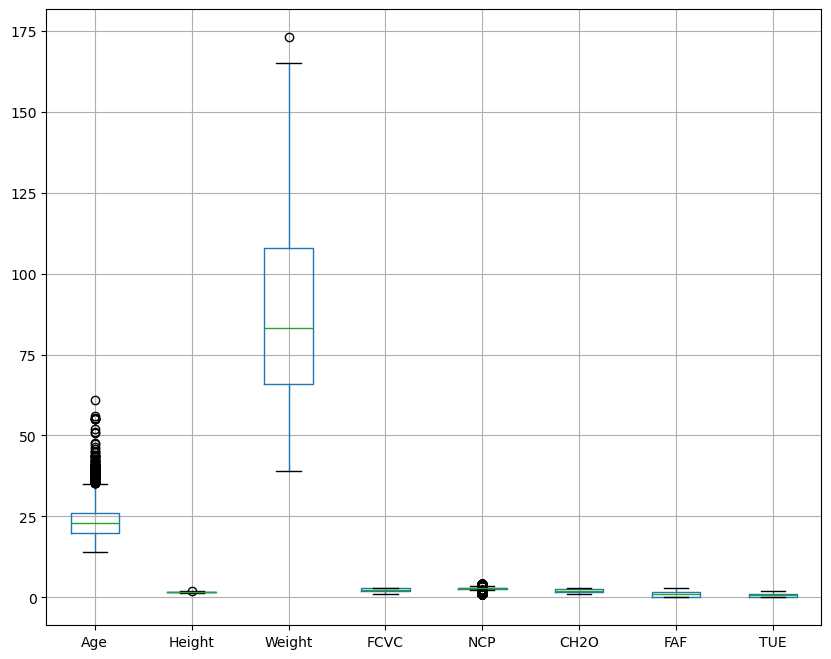

In [10]:
numeric_cols = df.select_dtypes(include = "float64")
numeric_cols.boxplot(figsize = (10, 8))
plt.show()

**Renaming variables**

In [11]:
df.rename(columns = {
    'FAVC' : 'frequent_high_caloric_food',
    'FCVC' : 'vegetable_frequency',
    'NCP' : 'meal_frequency',
    'CAEC' : 'food_between_meals',
    'SMOKE' : 'smoking_status',
    'CH2O' : 'daily_water_intake',
    'SCC' : 'monitors_calories',
    'FAF' : 'physical_activity',
    'TUE' : 'technology_use_time',
    'CALC' : 'alcohol_consumption',
    'MTRANS' : 'transport_mode',
    'NObeyesdad' : 'obesity_level'}, inplace = True)

**Handling Outliers**

In [12]:
Q1 =df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

**Frequency Table for Gender**

In [13]:
freq_table = df['Gender'].value_counts()
percent_table = df['Gender'].value_counts(normalize=True) * 100
result = pd.DataFrame({'Frequency': freq_table, 'Percentage': percent_table.round(2)})
print(result)

        Frequency  Percentage
Gender                       
Male          985        51.3
Female        935        48.7


**Frequency table for Obesity levels**

In [14]:
freq_table = df['obesity_level'].value_counts()
percent_table = df['obesity_level'].value_counts(normalize=True) * 100
result = pd.DataFrame({'Frequency': freq_table, 'Percentage': percent_table.round(2)})
print(result)

                     Frequency  Percentage
obesity_level                             
Obesity_Type_III           324       16.88
Obesity_Type_I             281       14.64
Normal_Weight              275       14.32
Obesity_Type_II            268       13.96
Insufficient_Weight        266       13.85
Overweight_Level_I         255       13.28
Overweight_Level_II        251       13.07


**Frequency tables for frequent_high_caloric_food**

In [15]:
freq_table = df['frequent_high_caloric_food'].value_counts()
percent_table = df['frequent_high_caloric_food'].value_counts(normalize=True) * 100
result = pd.DataFrame({'Frequency': freq_table, 'Percentage': percent_table.round(2)})
print(result)

                            Frequency  Percentage
frequent_high_caloric_food                       
yes                              1694       88.23
no                                226       11.77


**Frequency tables for transport_mode**

In [16]:
freq_table = df['transport_mode'].value_counts()
percent_table = df['transport_mode'].value_counts(normalize=True) * 100
result = pd.DataFrame({'Frequency': freq_table, 'Percentage': percent_table.round(2)})
print(result)

                       Frequency  Percentage
transport_mode                              
Public_Transportation       1550       80.73
Automobile                   301       15.68
Walking                       54        2.81
Motorbike                      9        0.47
Bike                           6        0.31


**Frequency tables for alcohol_consumption**

In [17]:
freq_table = df['alcohol_consumption'].value_counts()
percent_table = df['alcohol_consumption'].value_counts(normalize=True) * 100
result = pd.DataFrame({'Frequency': freq_table, 'Percentage': percent_table.round(2)})
print(result)

                     Frequency  Percentage
alcohol_consumption                       
Sometimes                 1287       67.03
no                         577       30.05
Frequently                  55        2.86
Always                       1        0.05


**Creating New Variables**

In [18]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

**Age Category**

In [19]:
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 18, 35, 60, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

**Healthy Drinking Habits daily_water_intake**

In [20]:
df['Healthy_Drinker'] = df['daily_water_intake'].apply(lambda x: 'Yes' if x >= 2 else 'No')

**.apply(lambda x: 'Yes' if x >= 2 else 'No'): Applies a custom function to each value x in the column:
If x is greater than or equal to 2 liters, the person is labeled 'Yes' (i.e., a healthy drinker). If x is less than 2 liters, the person is labeled 'No'.**

**Physical Activity Category**

In [21]:
df['Physical_Activity_Level'] = pd.cut(df['physical_activity'],
                                       bins=[-1, 0, 2, 5, 10],
                                       labels=['None', 'Low', 'Moderate', 'High'])

**Combined Lifestyle Score (from multiple variables)**

In [22]:
df['Lifestyle_Score'] = (
    (df['frequent_high_caloric_food'] == 'no').astype(int) + 
    (df['smoking_status'] == 'no').astype(int) + 
    (df['monitors_calories'] == 'yes').astype(int) + 
    (df['physical_activity'] > 2).astype(int)
)

**If a person does not frequently consume high-calorie food, this returns True → converted to 1. If they do, it returns False → converted to 0. If the person does not smoke, they get 1. Smokers get 0. If the person monitors their calorie intake, they get 1. Otherwise, 0. If the person engages in more than 2 hours of physical activity per week/day (depending on scale), they get 1. Otherwise, 0. All these 1s and 0s are added together to get a Lifestyle Score ranging from 0 to 4, where:
0 = No healthy behaviors
4 = All four healthy behaviors**

**Using apply() with lambda and if, elif, else**

In [23]:
df['Water_Category'] = df['daily_water_intake'].apply(lambda x: 
    'Low' if x < 1 else 
    'Moderate' if 1 <= x < 2 else 
    'High')

**Using np.where() for simpler binary conditions**

In [24]:
df['Is_Smoker'] = np.where(df['smoking_status'] == 'yes', 'Smoker', 'Non-Smoker')

**Using np.select() for multiple conditions**

In [25]:
conditions = [
    df['daily_water_intake'] < 1,
    (df['daily_water_intake'] >= 1) & (df['daily_water_intake'] < 2),
    df['daily_water_intake'] >= 2
]
choices = ['Low', 'Moderate', 'High']
df['Water_Level'] = np.select(conditions, choices)

**Pivoting Data (Wide ↔ Long Format)**

In [26]:
df_long = df.melt(id_vars=['Gender'], value_vars=['Height', 'Weight', 'Age'],
                  var_name='Variable', value_name='Value')

In [27]:
df_long.head()

,Gender,Variable,Value
0,Female,Height,1.62
1,Female,Height,1.52
2,Male,Height,1.80
3,Male,Height,1.80
4,Male,Height,1.78


**Grouped Reshaping: groupby() + pivot_table()**

In [28]:
df_summary = df.pivot_table(index='Gender', columns='obesity_level', values='Weight', aggfunc='mean')

In [29]:
df_summary.head()

obesity_level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,46.779392,56.265909,83.874372,96.750000,120.779941,69.842129,73.057801
Male,55.556979,67.542657,101.643129,115.487763,173.000000,79.880177,86.338521


**Stacking / Unstacking**

In [30]:
df_stacked = df.stack() ## Make columns into rows

In [31]:
df_stacked.head()

0  Gender                            Female
   Age                                 21.0
   Height                              1.62
   Weight                              64.0
   family_history_with_overweight       yes
dtype: object

In [32]:
df_unstacked = df_stacked.unstack()  ## Reverse stack

In [33]:
df_unstacked.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_high_caloric_food,vegetable_frequency,meal_frequency,food_between_meals,smoking_status,...,transport_mode,obesity_level,BMI,Age_Group,Healthy_Drinker,Physical_Activity_Level,Lifestyle_Score,Water_Category,Is_Smoker,Water_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,Public_Transportation,Normal_Weight,24.386526,Young Adult,Yes,None,2,High,Non-Smoker,High
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Public_Transportation,Normal_Weight,24.238227,Young Adult,Yes,Moderate,3,High,Smoker,High
2,Male,23.0,1.8,77.0,yes,no,2.0,3.0,Sometimes,no,...,Public_Transportation,Normal_Weight,23.765432,Young Adult,Yes,Low,2,High,Non-Smoker,High
3,Male,27.0,1.8,87.0,no,no,3.0,3.0,Sometimes,no,...,Walking,Overweight_Level_I,26.851852,Young Adult,Yes,Low,2,High,Non-Smoker,High
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Public_Transportation,Overweight_Level_II,28.342381,Young Adult,Yes,None,2,High,Non-Smoker,High


**Transposing Data**

In [34]:
df_transposed = df.T    ## Flips rows to columns (or vice versa)
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110
Gender,Female,Female,Male,Male,Male,Male,Female,Male,Male,Male,...,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
Age,21.0,21.0,23.0,27.0,22.0,29.0,23.0,22.0,24.0,22.0,...,25.722004,25.765628,21.016849,21.682367,21.285965,20.976842,21.982942,22.524036,24.361936,23.664709
Height,1.62,1.52,1.8,1.8,1.78,1.62,1.5,1.64,1.78,1.72,...,1.62847,1.627839,1.724268,1.732383,1.72692,1.71073,1.748584,1.752206,1.73945,1.738836
Weight,64.0,56.0,77.0,87.0,89.8,53.0,55.0,53.0,64.0,68.0,...,107.218949,108.10736,133.033523,133.043941,131.335786,131.408528,133.742943,133.689352,133.346641,133.472641
family_history_with_overweight,yes,yes,yes,no,no,no,yes,no,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes


**pivot() – Reshape long to wide
df_wide = df.pivot(index='ID', columns='Variable', values='Value')**

**melt() – Reshape wide to long
df_long = df.melt(id_vars=['ID'], value_vars=['Height', 'Weight'])**